In [1]:
import astropy.units as u
from astropy.time import Time
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import numpy as np
from twobody import KeplerOrbit, Barycenter

In [2]:
origin = coord.ICRS(ra=14.745*u.deg, dec=71.512*u.deg,
                    distance=71.634*u.pc,
                    pm_ra_cosdec=32.123*u.mas/u.yr,
                    pm_dec=86.63*u.mas/u.yr,
                    radial_velocity=17.4123*u.km/u.s)
barycen = Barycenter(origin=origin, t0=Time('J2014'))

In [3]:
orb = KeplerOrbit(P=4332.589*u.day, a=5.20336301*u.au, e=0.04839266,
                  omega=0*u.deg, i=60*u.deg, Omega=0*u.deg,
                  M0=34.40438*u.deg, t0=Time('J2015.0'),
                  barycenter=barycen)
t = Time('J2010') + np.linspace(0, 2*orb.P.value, 10000)*orb.P.unit

In [4]:
orb_ref = orb.reference_plane(t)

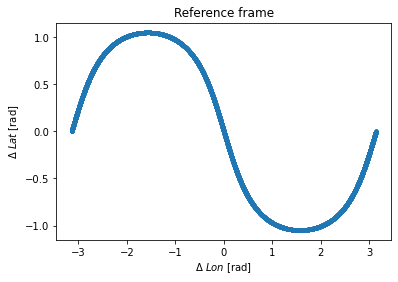

In [5]:
fig,ax = plt.subplots(1, 1) 
ax.plot(orb_ref.lon.wrap_at(180*u.deg).rad,
        orb_ref.lat.rad, marker='.', ls='') 
ax.set_ylabel(r'$\Delta\ Lat$ [{0:latex_inline}]'.format(u.rad)) 
ax.set_xlabel(r'$\Delta\ Lon$ [{0:latex_inline}]'.format(u.rad))
ax.set_title('Reference frame');

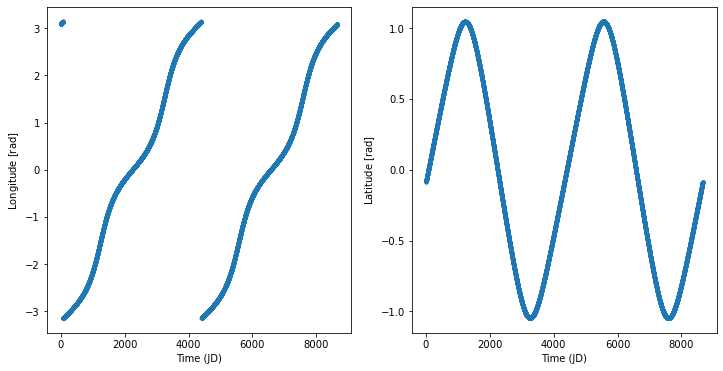

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6)) 
ax1.plot(t.jd - t.jd[0], orb_ref.lon.wrap_at(180*u.deg).rad, marker='.', ls='') 
ax2.plot(t.jd - t.jd[0], orb_ref.lat.rad, marker='.', ls='')
ax1.set_ylabel(r'Longitude [{0:latex_inline}]'.format(u.rad))
ax2.set_ylabel(r'Latitude [{0:latex_inline}]'.format(u.rad))
for ax in (ax1,ax2):
    ax.set_xlabel('Time (JD)');

In [7]:
orb_plane = orb.orbital_plane(t)

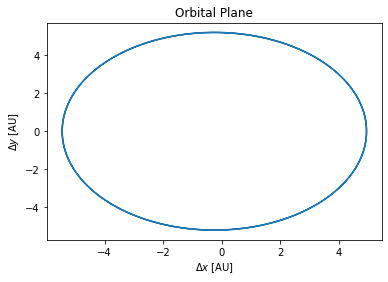

In [8]:
fig,ax = plt.subplots(1, 1) 
ax.plot(orb_plane.x,
        orb_plane.y, marker='') 
ax.set_xlabel(r'$\Delta x$ [{0:latex_inline}]'.format(u.au)) 
ax.set_ylabel(r'$\Delta y$ [{0:latex_inline}]'.format(u.au))
ax.set_title('Orbital Plane');

In [9]:
orb_icrs = orb.icrs(t)

In [10]:
offset_frame = coord.SkyOffsetFrame(origin=origin)
orb_offset = orb_icrs.transform_to(offset_frame)

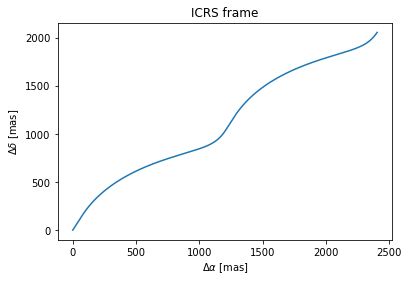

In [11]:
fig,ax = plt.subplots(1, 1) 
ax.plot(orb_icrs.ra.milliarcsecond - orb_icrs.ra.milliarcsecond[0],
        orb_icrs.dec.milliarcsecond - orb_icrs.dec.milliarcsecond[0], marker='') 
ax.set_xlabel(r'$\Delta\alpha$ [{0:latex_inline}]'.format(u.mas)) 
ax.set_ylabel(r'$\Delta\delta$ [{0:latex_inline}]'.format(u.mas))
ax.set_title('ICRS frame');

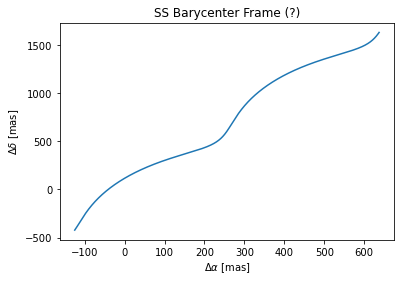

In [12]:
fig,ax = plt.subplots(1, 1) 
ax.plot(orb_offset.lon.wrap_at(180*u.deg).milliarcsecond,
        orb_offset.lat.milliarcsecond, marker='') 
ax.set_xlabel(r'$\Delta\alpha$ [{0:latex_inline}]'.format(u.mas)) 
ax.set_ylabel(r'$\Delta\delta$ [{0:latex_inline}]'.format(u.mas))
ax.set_title('SS Barycenter Frame (?)');